# STOCK PRICE PREDICTION

## Author- Adarsh Tiwari

### Aim-The aim is to build a good and effective prediction systems for the stock market to help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

### IMPORTING NECESSARY LIBRARIES AND READING THE DATAFRAME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dframe=pd.read_excel('stockprice.xlsx')


### EXPLORATORY DATA ANALYSIS

In [3]:
dframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [4]:
dframe.shape

(1009, 7)

#### The given dataset contains 7 features(columns) and 1009 entries(rows) which might contain some of the duplicate entries

In [5]:
#dropping the duplicate entries
dframe=dframe.drop_duplicates()

In [6]:
dframe.shape
#rechecking the shape after dropping duplicate values

(1009, 7)

In [7]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 63.1 KB


#### Our dataframe has 1009 unique entries with 6 colums of float type and 1 of datetime with no null values

In [8]:
#statistical data analysis 
dframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
#columns or features of dataframe
dframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
#number of unique entries in every column
dframe.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

### Data Analysis

In [11]:
#sorting values in descending order
dframe['Open'].sort_values(ascending=False )

956    692.349976
955    691.609985
954    690.000000
942    689.059998
945    685.890015
          ...    
5      252.139999
225    250.110001
1      247.699997
223    242.000000
224    233.919998
Name: Open, Length: 1009, dtype: float64

#### The maximum opening price  is around 693 and minimum price is 234

In [12]:
#setting date as index
dframe.set_index('Date', inplace=True)
dframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [13]:
dframe[dframe['Volume']>20000000][['Open','High','Low']].sort_values(by='Open')

,Open,High,Low
Date,,,
2018-12-21,263.829987,264.500000,241.289993
2018-10-30,275.570007,290.519989,271.209991
2019-09-20,280.260010,282.500000,266.000000
2019-10-18,289.359985,290.899994,273.359985
2018-10-31,297.769989,311.500000,295.049988
2019-10-17,304.489990,308.750000,288.299988
2018-10-29,305.260010,307.890015,275.399994
2018-04-16,315.989990,316.100006,304.000000
2019-07-18,323.760010,329.850006,320.299988


#### It tells us that number of stocks more than 20 crores range in opening amount of 260 to 565

In [14]:
#highest valued stock price
col=dframe.sort_values(by='High',ascending= False).head(5)
col['High']


Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [15]:
dframe['Daily_returns'] = dframe['Adj Close'].pct_change() # calculates the percentage change between the current and a prior element.
dframe.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,-0.002519


In [16]:
#best day of stock
dframe[dframe['Daily_returns']==dframe['Daily_returns'].max()]['Daily_returns']

Date
2021-01-20    0.168543
Name: Daily_returns, dtype: float64

In [17]:
#worst day of stock
dframe[dframe['Daily_returns']==dframe['Daily_returns'].min()]['Daily_returns']

Date
2022-01-21   -0.217905
Name: Daily_returns, dtype: float64

## DATA VISUALIZATION

Text(0.5, 1.0, 'Stock Plot for Overall Period')

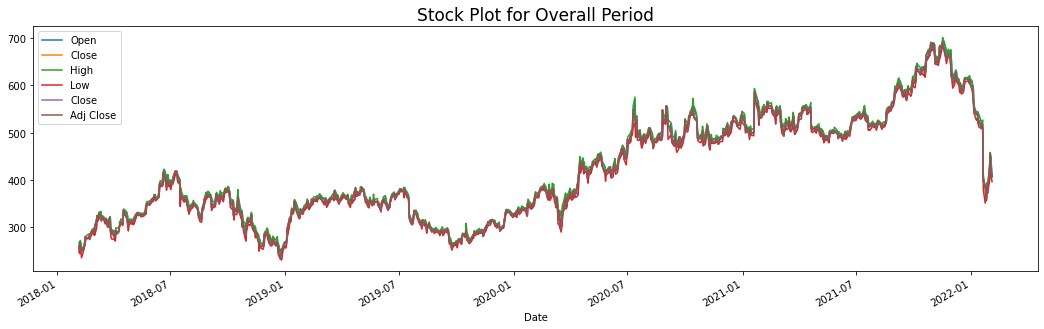

In [18]:
dframe[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title("Stock Plot for Overall Period", fontsize=17)

#### The above plot tells that there is considerable increase in cost of stock from 2020 adn falls cosiderably in 2022

<AxesSubplot:title={'center':'0pening amount'}, xlabel='Closing amount', ylabel='Opening amount'>

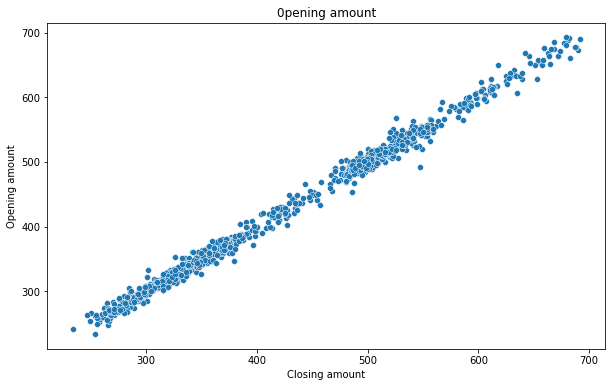

In [19]:
# kms driven vs age with differentiation of different owners
plt.figure(figsize=(10,6))
plt.title('0pening amount')
plt.xlabel('Closing amount')
plt.ylabel('Opening amount')
sns.scatterplot(y=dframe['Open'],x=dframe['Close'])

#### Opening and closing amounts are almost linear

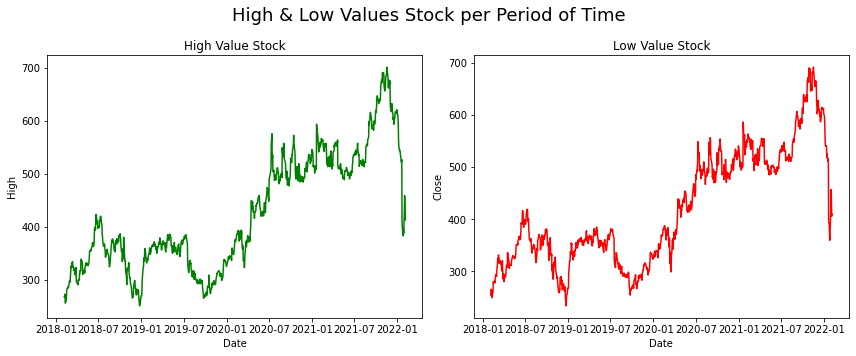

In [20]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=dframe['High'],x=dframe.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=dframe['Close'], x=dframe.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

#### Above plot indicates most of the bikes are 3-10 years old which is the normal duration a bike lasts with an owner in INDIA

<AxesSubplot:xlabel='Date', ylabel='Volume'>

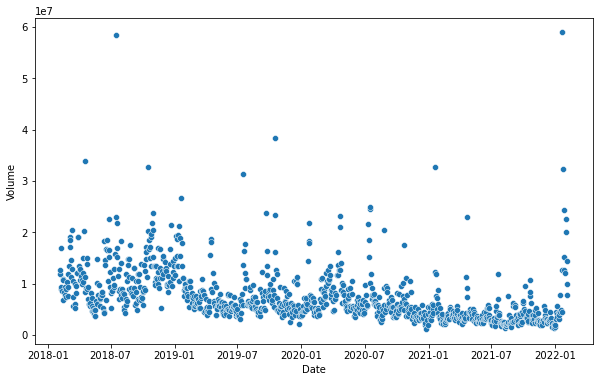

In [21]:
#Scatter plot of age vs price of Bikes in India
plt.figure(figsize=(10,6))
sns.scatterplot(x=dframe.index,y='Volume',data=dframe)

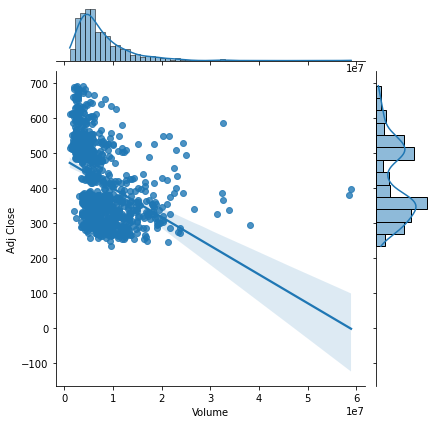

In [22]:
sns.jointplot(x='Volume', y='Adj Close', data=dframe, kind='reg')

#### We analyze that volume of higher closing balance is less than lower ones


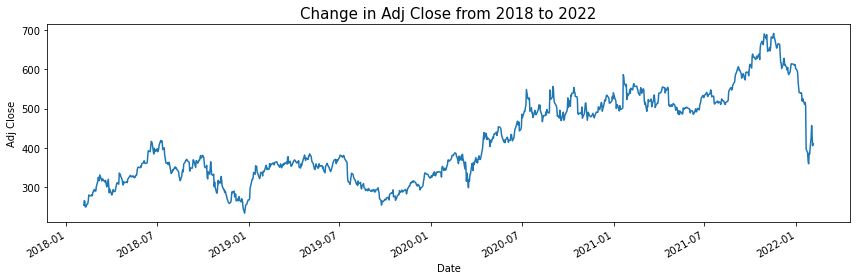

In [23]:
plt.figure(figsize=(12,4))
dframe['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

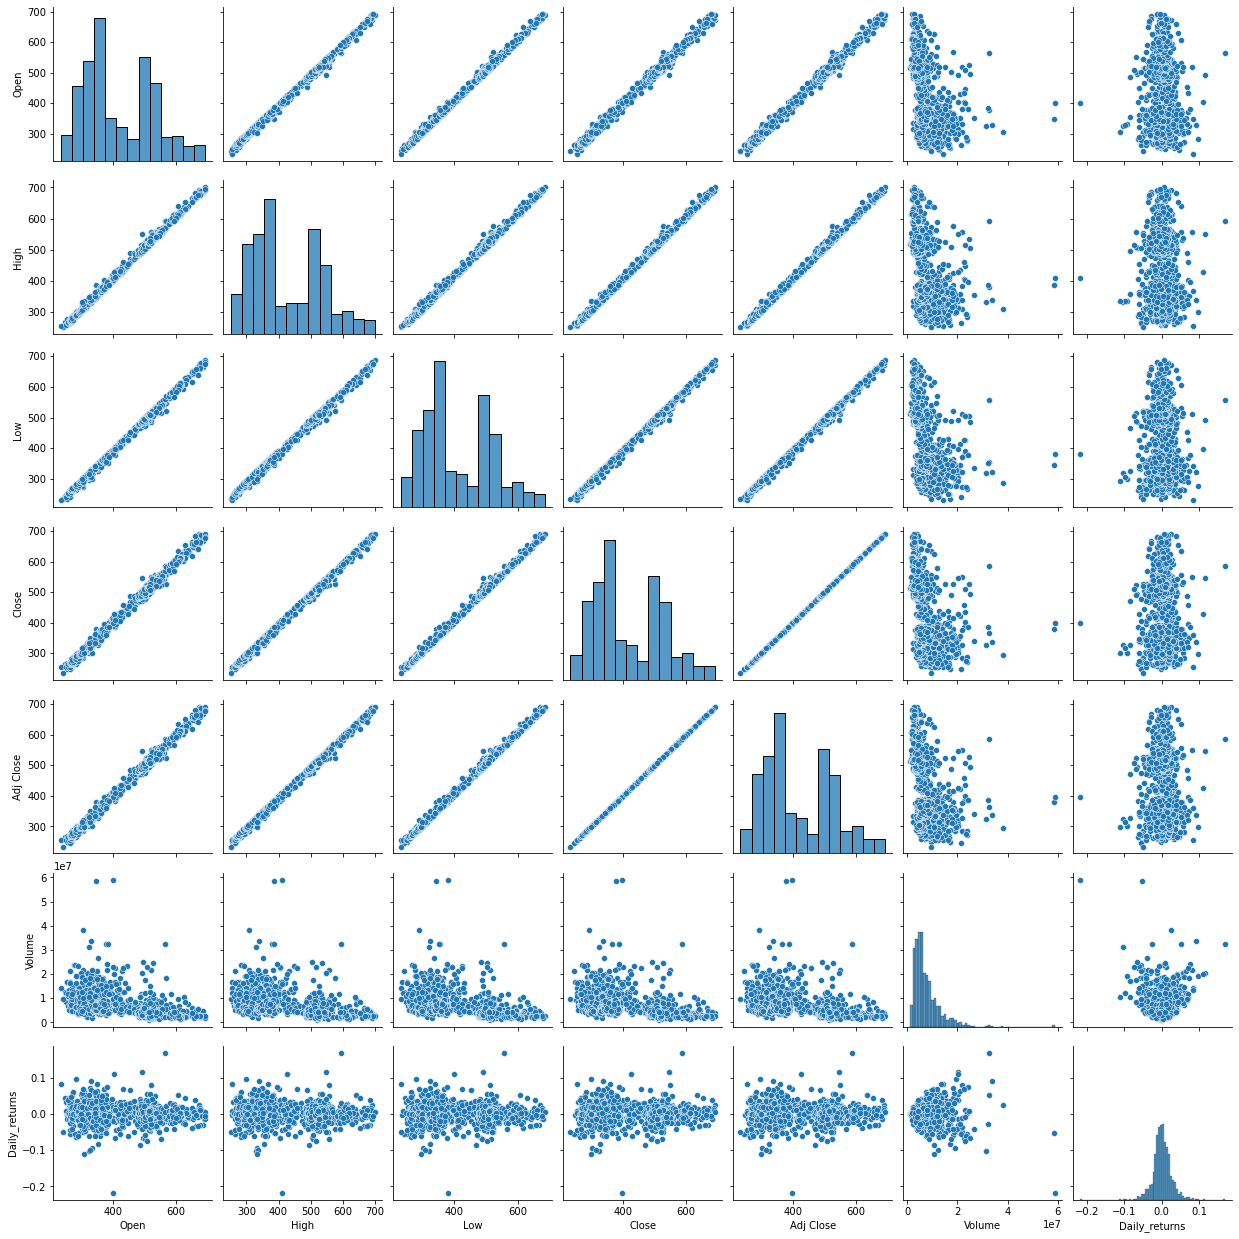

In [24]:
#plotting all the continuous features pair against each other using pairplot
sns.pairplot(dframe)

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

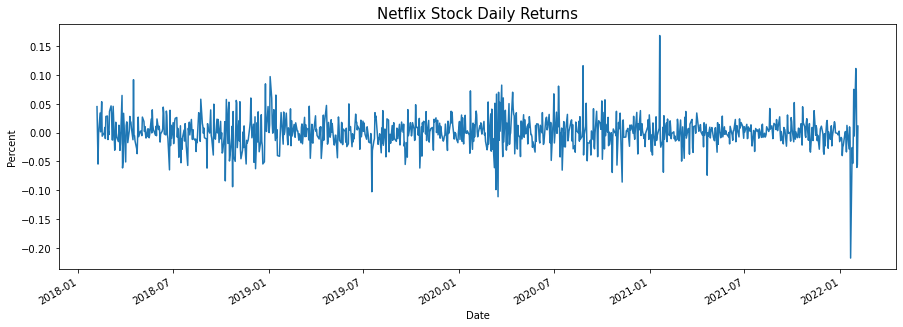

In [25]:
plt.figure(figsize=(15,5))
dframe['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

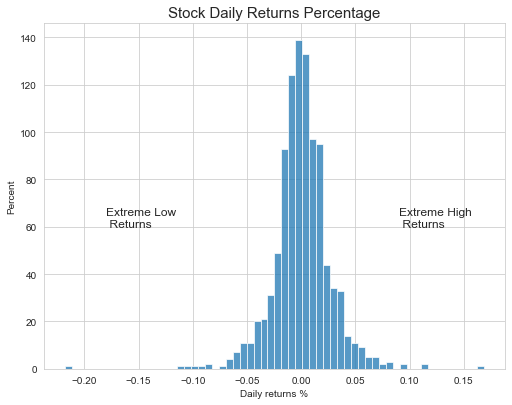

In [26]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= dframe['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()


### Cumulative Returns

In [27]:
#finding cumulative returns over time of stock
dframe['Cumulative']= (dframe['Daily_returns']+1).cumprod()
dframe['Cumulative'].head()

Date
2018-02-05         NaN
2018-02-06    1.045072
2018-02-07    1.040510
2018-02-08    0.983639
2018-02-09    0.981161
Name: Cumulative, dtype: float64

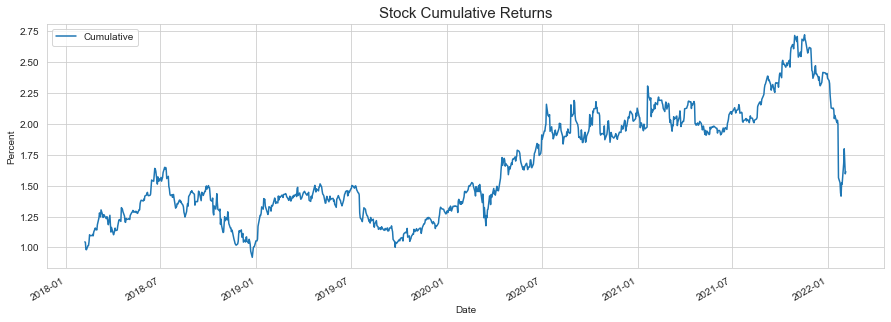

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
dframe['Cumulative'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Stock Cumulative Returns",fontsize= 15 )
plt.legend()

#### Rolling windows is used to calculate running values, means totals , mostly used in time series dataset

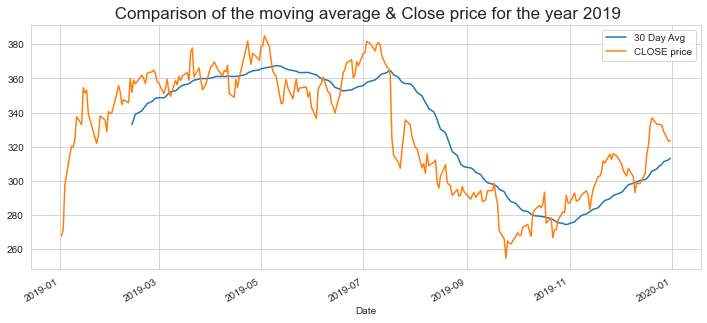

In [29]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
dframe['Close'].loc['2019-01-01': '2019-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
dframe['Close'].loc['2019-01-01':'2019-12-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 2019", fontsize=17)
plt.legend()

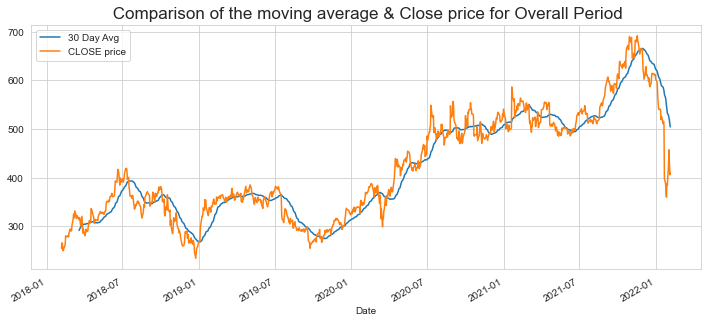

In [30]:
f= plt.figure(figsize=(12,5))
dframe['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
dframe['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

#### A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.

Text(0.5, 1.0, ' Bollinger Band Plot for Overall Period')

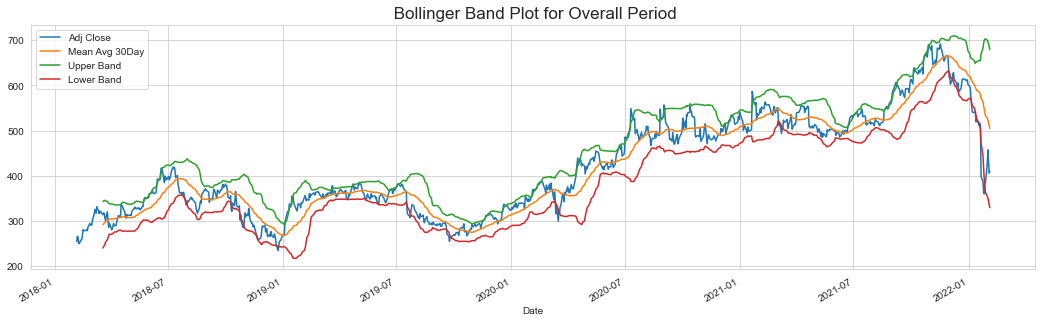

In [31]:
dframe['Mean Avg 30Day'] = dframe['Close'].rolling(window=30).mean() # MA= mean Average
dframe['STD 30Day'] = dframe['Close'].rolling(window=30).std()
dframe['Upper Band']= dframe['Mean Avg 30Day'] + (dframe['STD 30Day'] *2)
dframe['Lower Band']= dframe['Mean Avg 30Day'] - (dframe['STD 30Day'] *2)
dframe[['Adj Close', 'Mean Avg 30Day', 'Upper Band', 'Lower Band']].plot(figsize=(18,5))
plt.title(" Bollinger Band Plot for Overall Period", fontsize=17)

## Correlation amongst Variables

In [32]:
#Correlation matrix
corri=dframe[['Open','Close','Low','High','Volume']].corr()
corri

,Open,Close,Low,High,Volume
Open,1.000000,0.996812,0.998508,0.998605,-0.415838
Close,0.996812,1.000000,0.998544,0.998551,-0.413362
Low,0.998508,0.998544,1.000000,0.998203,-0.432116
High,0.998605,0.998551,0.998203,1.000000,-0.400699
Volume,-0.415838,-0.413362,-0.432116,-0.400699,1.000000


<AxesSubplot:>

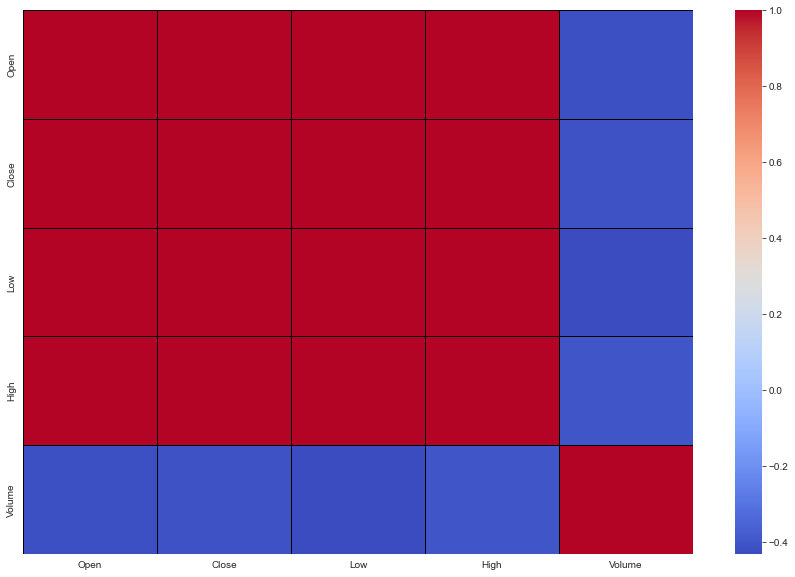

In [33]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corri,linewidths=1,linecolor='black',cmap='coolwarm')

## Train & Test

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [35]:
#training and splitting the data
X= dframe[['Open', 'High', 'Low', 'Close', 'Volume']]
y= dframe['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
#scaling the dataset 
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Using Linear Regression to predict

In [37]:
#Defining the regression model
regression = LinearRegression()
regression.fit(X_train,y_train)
print('Training Complete')

Training Complete


In [38]:
predict = regression.predict(X_test)
print(predict.shape)

(303,)


In [39]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict)))
print("(R^2) Score:",metrics.r2_score(y_test, predict))
print(f'Train Score : {regression.score(X_train, y_train) * 100:.2f}% and Test Score : {regression.score(X_test, y_test) * 100:.2f}% using linear regression.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 6.659872506794339e-14
Mean Squared Error: 8.648456538527555e-27
Root Mean Squared Error: 9.299707811822668e-14
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using linear regression.
Accuracy: 100.0 %.


#### Our model gives accuracy of 100%

## Using Random Forest Regressor

In [40]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict.shape

(303,)

In [41]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict)))
print("(R^2) Score:",metrics.r2_score(y_test, predict))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.6654483411482313
Mean Squared Error: 2.2327873126612725
Root Mean Squared Error: 1.494251422171407
(R^2) Score: 0.9998015038138929
Train Score : 100.00% and Test Score : 99.98% using Random Tree Regressor.
Accuracy: 99.85 %.


## Future Predictions

In [47]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=dframe.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
tendays_df = pd.DataFrame(predictions[:10])
tendays_df.to_csv("ten-days-predictions.csv")

In [49]:
print(predictions)

            Predictions
2022-02-04   553.971376
2022-02-05   379.249786
2022-02-06   361.311958
2022-02-07   282.406200
2022-02-08   261.110633
...                 ...
2022-11-29   546.881825
2022-11-30   410.687537
2022-12-01   278.800790
2022-12-02   406.711621
2022-12-03   328.576020

[303 rows x 1 columns]


Buy price and date
   Unnamed: 0  Predictions
4  2022-02-08   261.110633 

Sell price and date
   Unnamed: 0  Predictions
0  2022-02-04   553.971376


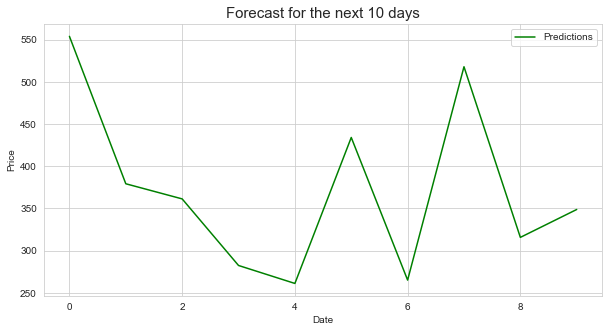

In [51]:
tendays_df= pd.read_csv("ten-days-predictions.csv")
buy_price = min(tendays_df["Predictions"])
sell_price = max(tendays_df["Predictions"])
tendays_buy = tendays_df.loc[tendays_df_pred["Predictions"] == buy_price]
tendays_sell = tendays_df.loc[tendays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(tendays_buy,'\n')
print("Sell price and date")
print(tendays_sell)
tendays_df_pred["Predictions"].plot(figsize=(10, 5), color="green")
plt.title("Forecast for the next 10 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# THANK YOU!